In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# shAI Training 2022 
## Task #9  (End-to-End ML Project {diamond-price})
### Maryam /mahmoud/ malak

In [ ]:

from sklearn.preprocessing import OneHotEncoder
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import metrics

***
# 1- Get the Data
***

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/train.csv")
test_data= pd.read_csv("/content/drive/MyDrive/Data/test.csv")
data.head()

Id  carat      cut color clarity  depth  table  price     x     y     z
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50

In [ ]:
test_id=test_data[["Id"]]
test_id

Id
0          1
1          2
2          3
3          4
4          5
...      ...
10783  10784
10784  10785
10785  10786
10786  10787
10787  10788

[10788 rows x 1 columns]

In [ ]:

print(test_data.duplicated().sum())
test_data = test_data.drop_duplicates()
test_data = test_data.drop(["Id"], axis=1)

0


In [ ]:
test_data.head()

In [ ]:
data.shape 

In [ ]:
data.info()

In [ ]:
print(data.duplicated().sum())
data = data.drop_duplicates()

0


In [ ]:
# drop id col
data = data.drop(["Id"], axis=1)
data.describe()

carat         depth         table         price             x  \
count  43152.000000  43152.000000  43152.000000  43152.000000  43152.000000   
mean       0.797855     61.747177     57.458347   3929.491912      5.731568   
std        0.473594      1.435454      2.233904   3985.527795      1.121279   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    947.750000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5312.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  43152.000000  43152.000000  
mean       5.735018      3.538568  
std        1.148809      0.708238  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

***
# 2- Discover and visualize the data
***

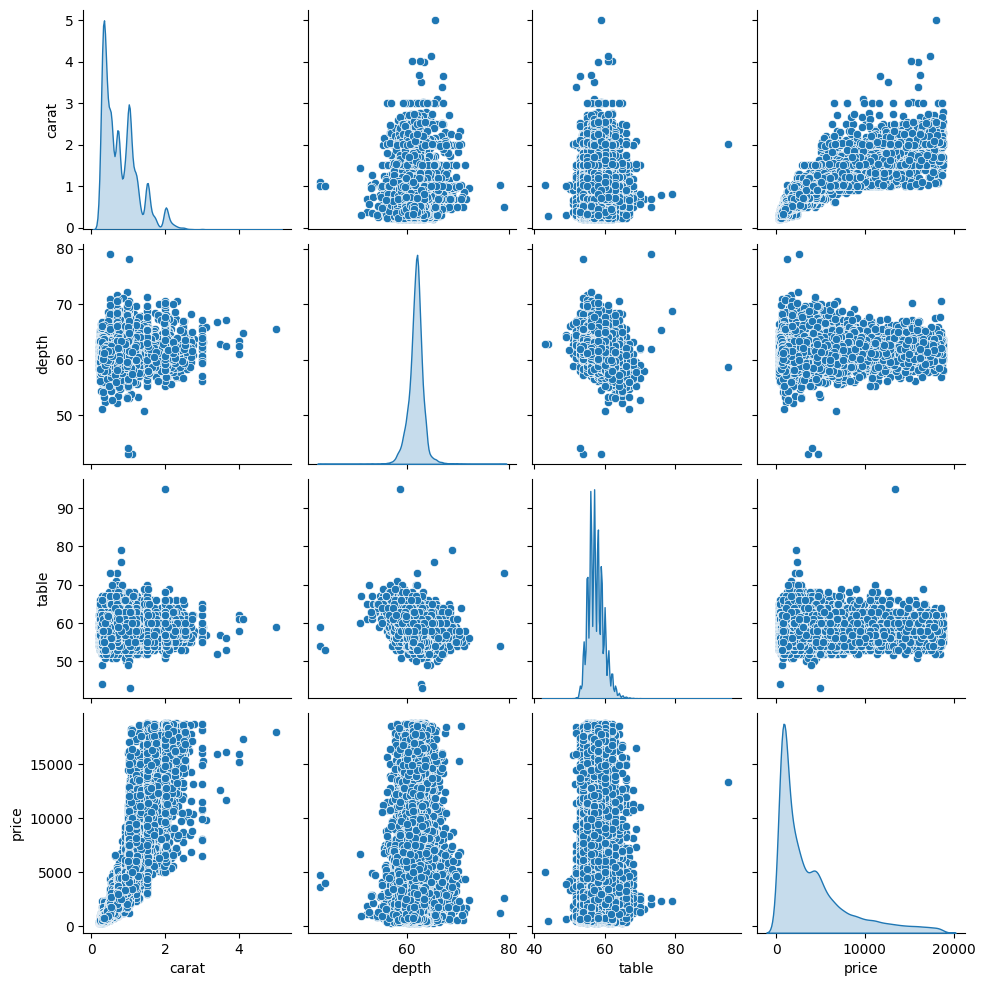

In [ ]:
sns.pairplot(data, vars=['carat', 'depth', 'table', 'price'], diag_kind='kde')
plt.show()

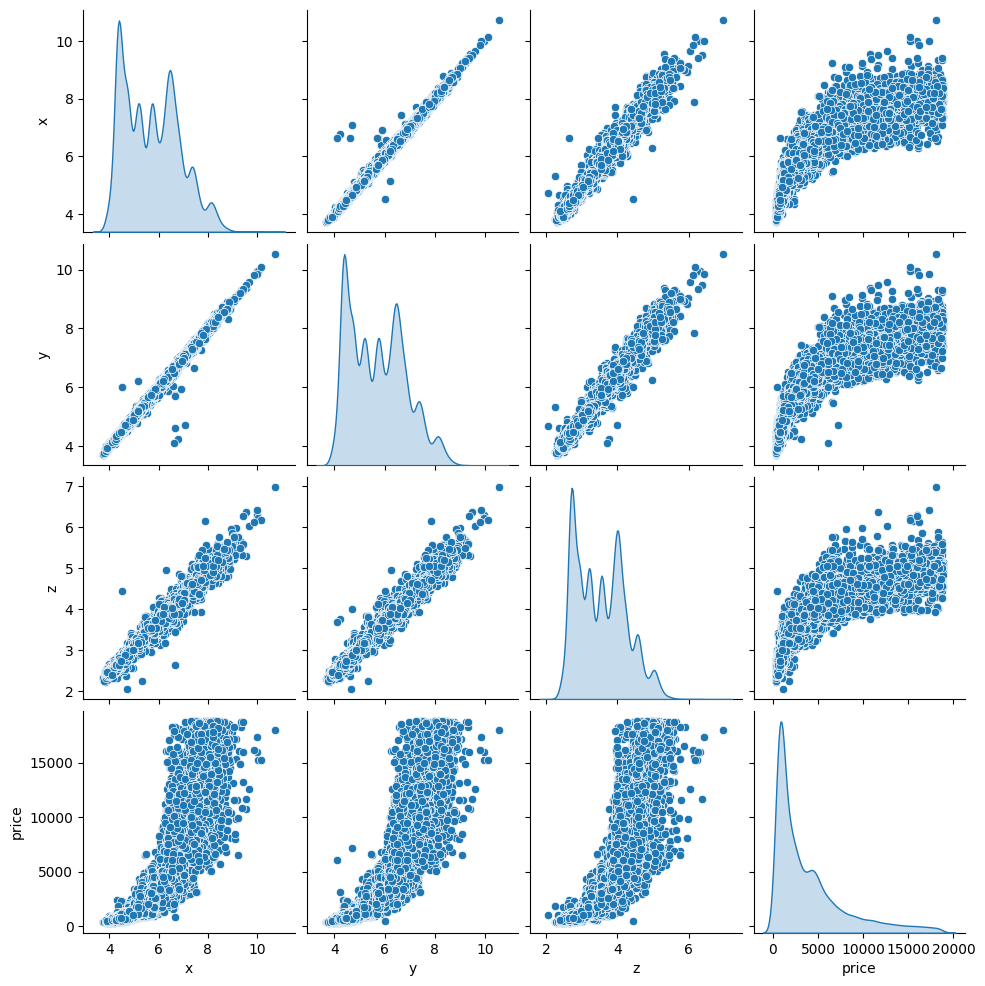

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.pairplot(data, vars=['x', 'y', 'z', 'price'], diag_kind='kde')
plt.show()

In [ ]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(43135, 10)

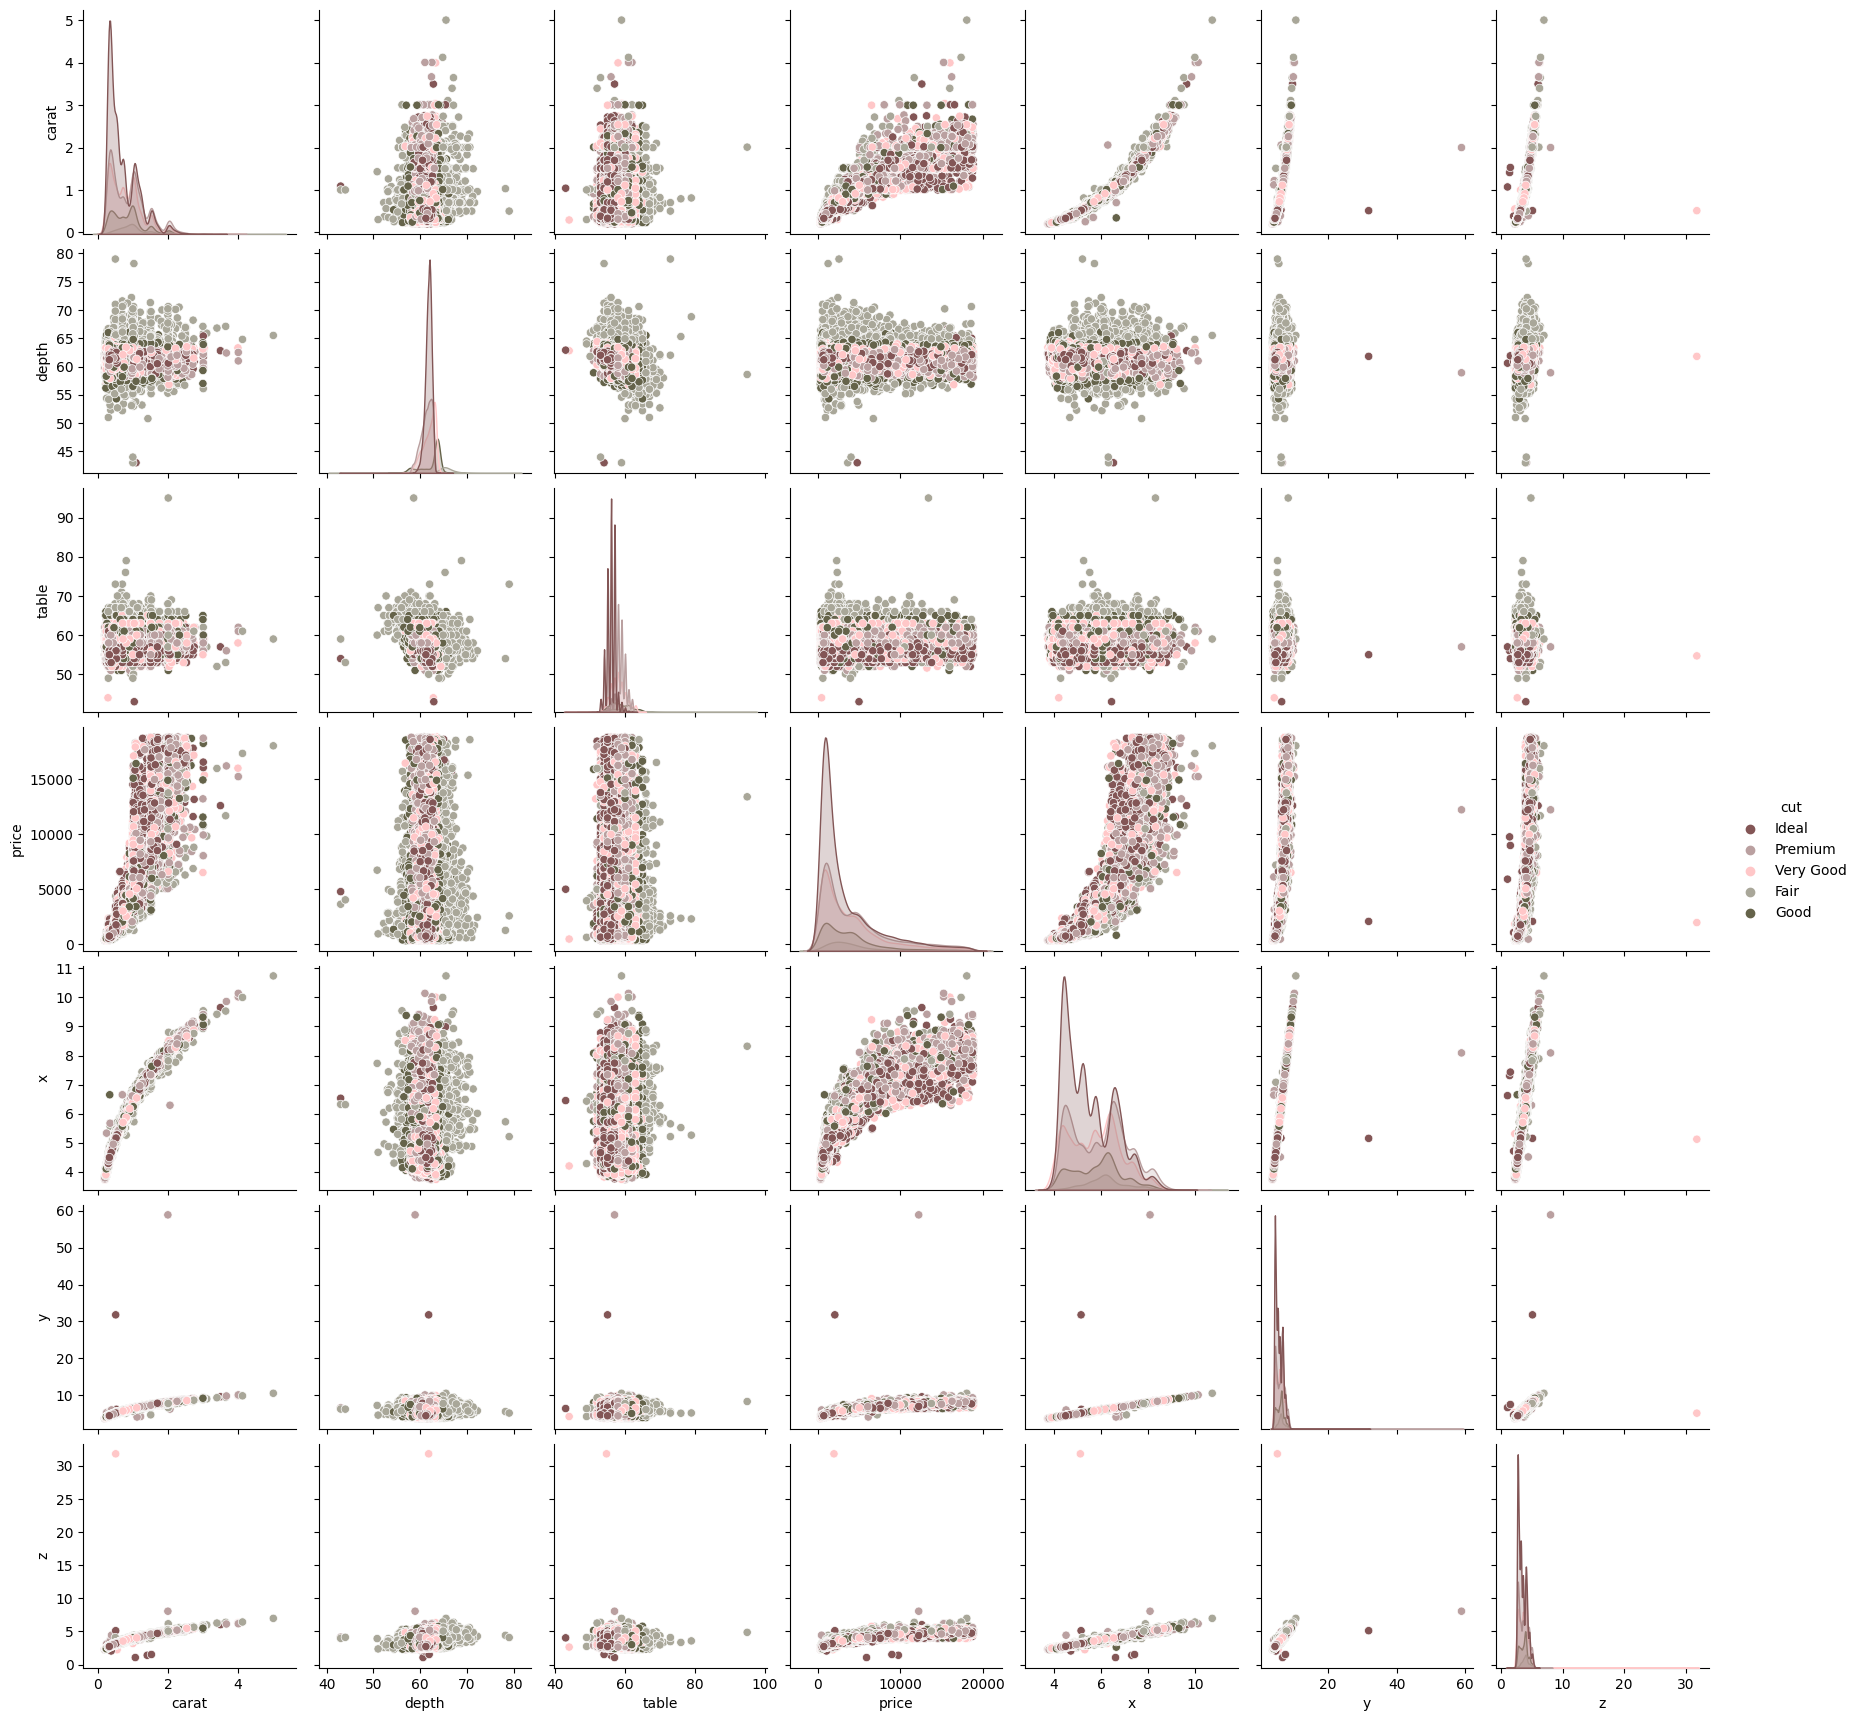

In [ ]:
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]
ax = sns.pairplot(data, hue= "cut",palette=shade)

#### 1-visualize the outliers

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

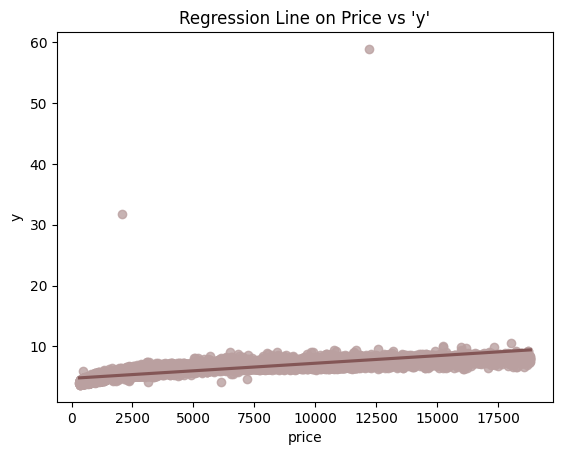

In [ ]:
ax = sns.regplot(x="price", 
                 y="y", 
                 data=data, 
                 fit_reg=True,
                 scatter_kws={"color": '#baa0a0'}, 
                 line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

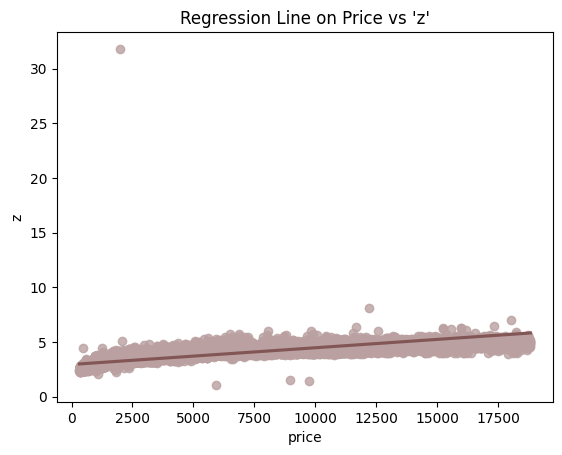

In [ ]:
ax= sns.regplot(x="price",
                y="z", 
                data=data, 
                fit_reg=True, 
                scatter_kws={"color":  '#baa0a0'},
                line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'z'")

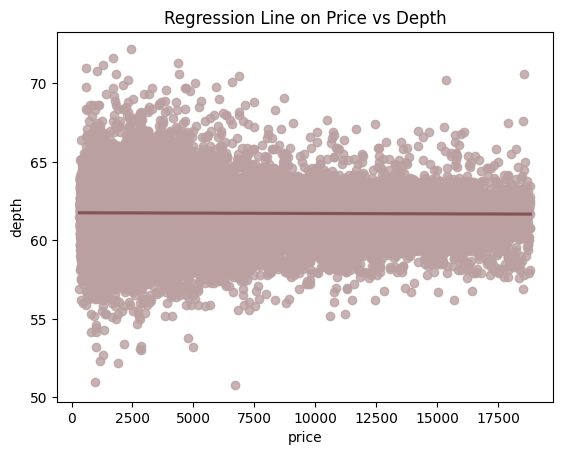

In [ ]:
ax= sns.regplot(x="price",
                y="depth",
                data=data,
                fit_reg=True,
                scatter_kws={"color":  '#baa0a0'}, 
                line_kws={"color": "#835656"})

ax.set_title("Regression Line on Price vs Depth")

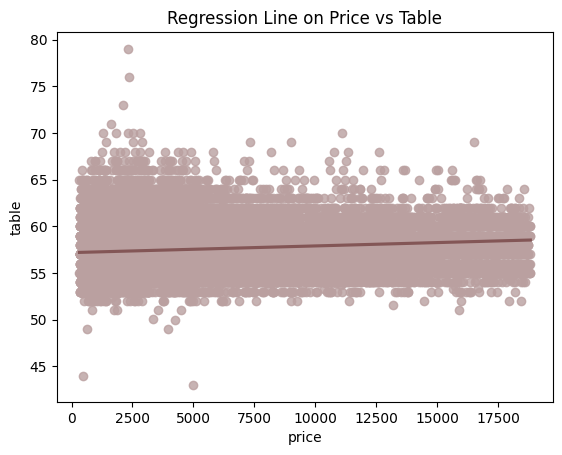

In [ ]:
ax=sns.regplot(x="price", y="table",
               data=data, fit_reg=True,
               scatter_kws={"color":  '#baa0a0'},
               line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Table")
plt.savefig('my_plot10.png')


#### 2-Dropping the outliers




In [ ]:
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(43123, 10)

In [ ]:
data['volume'] = data['x'].values * data['y'].values * data['z'].values
data= data.drop(['x', 'y', 'z'], axis= 1)

#### 3-visualize the data after Dropping the outliers


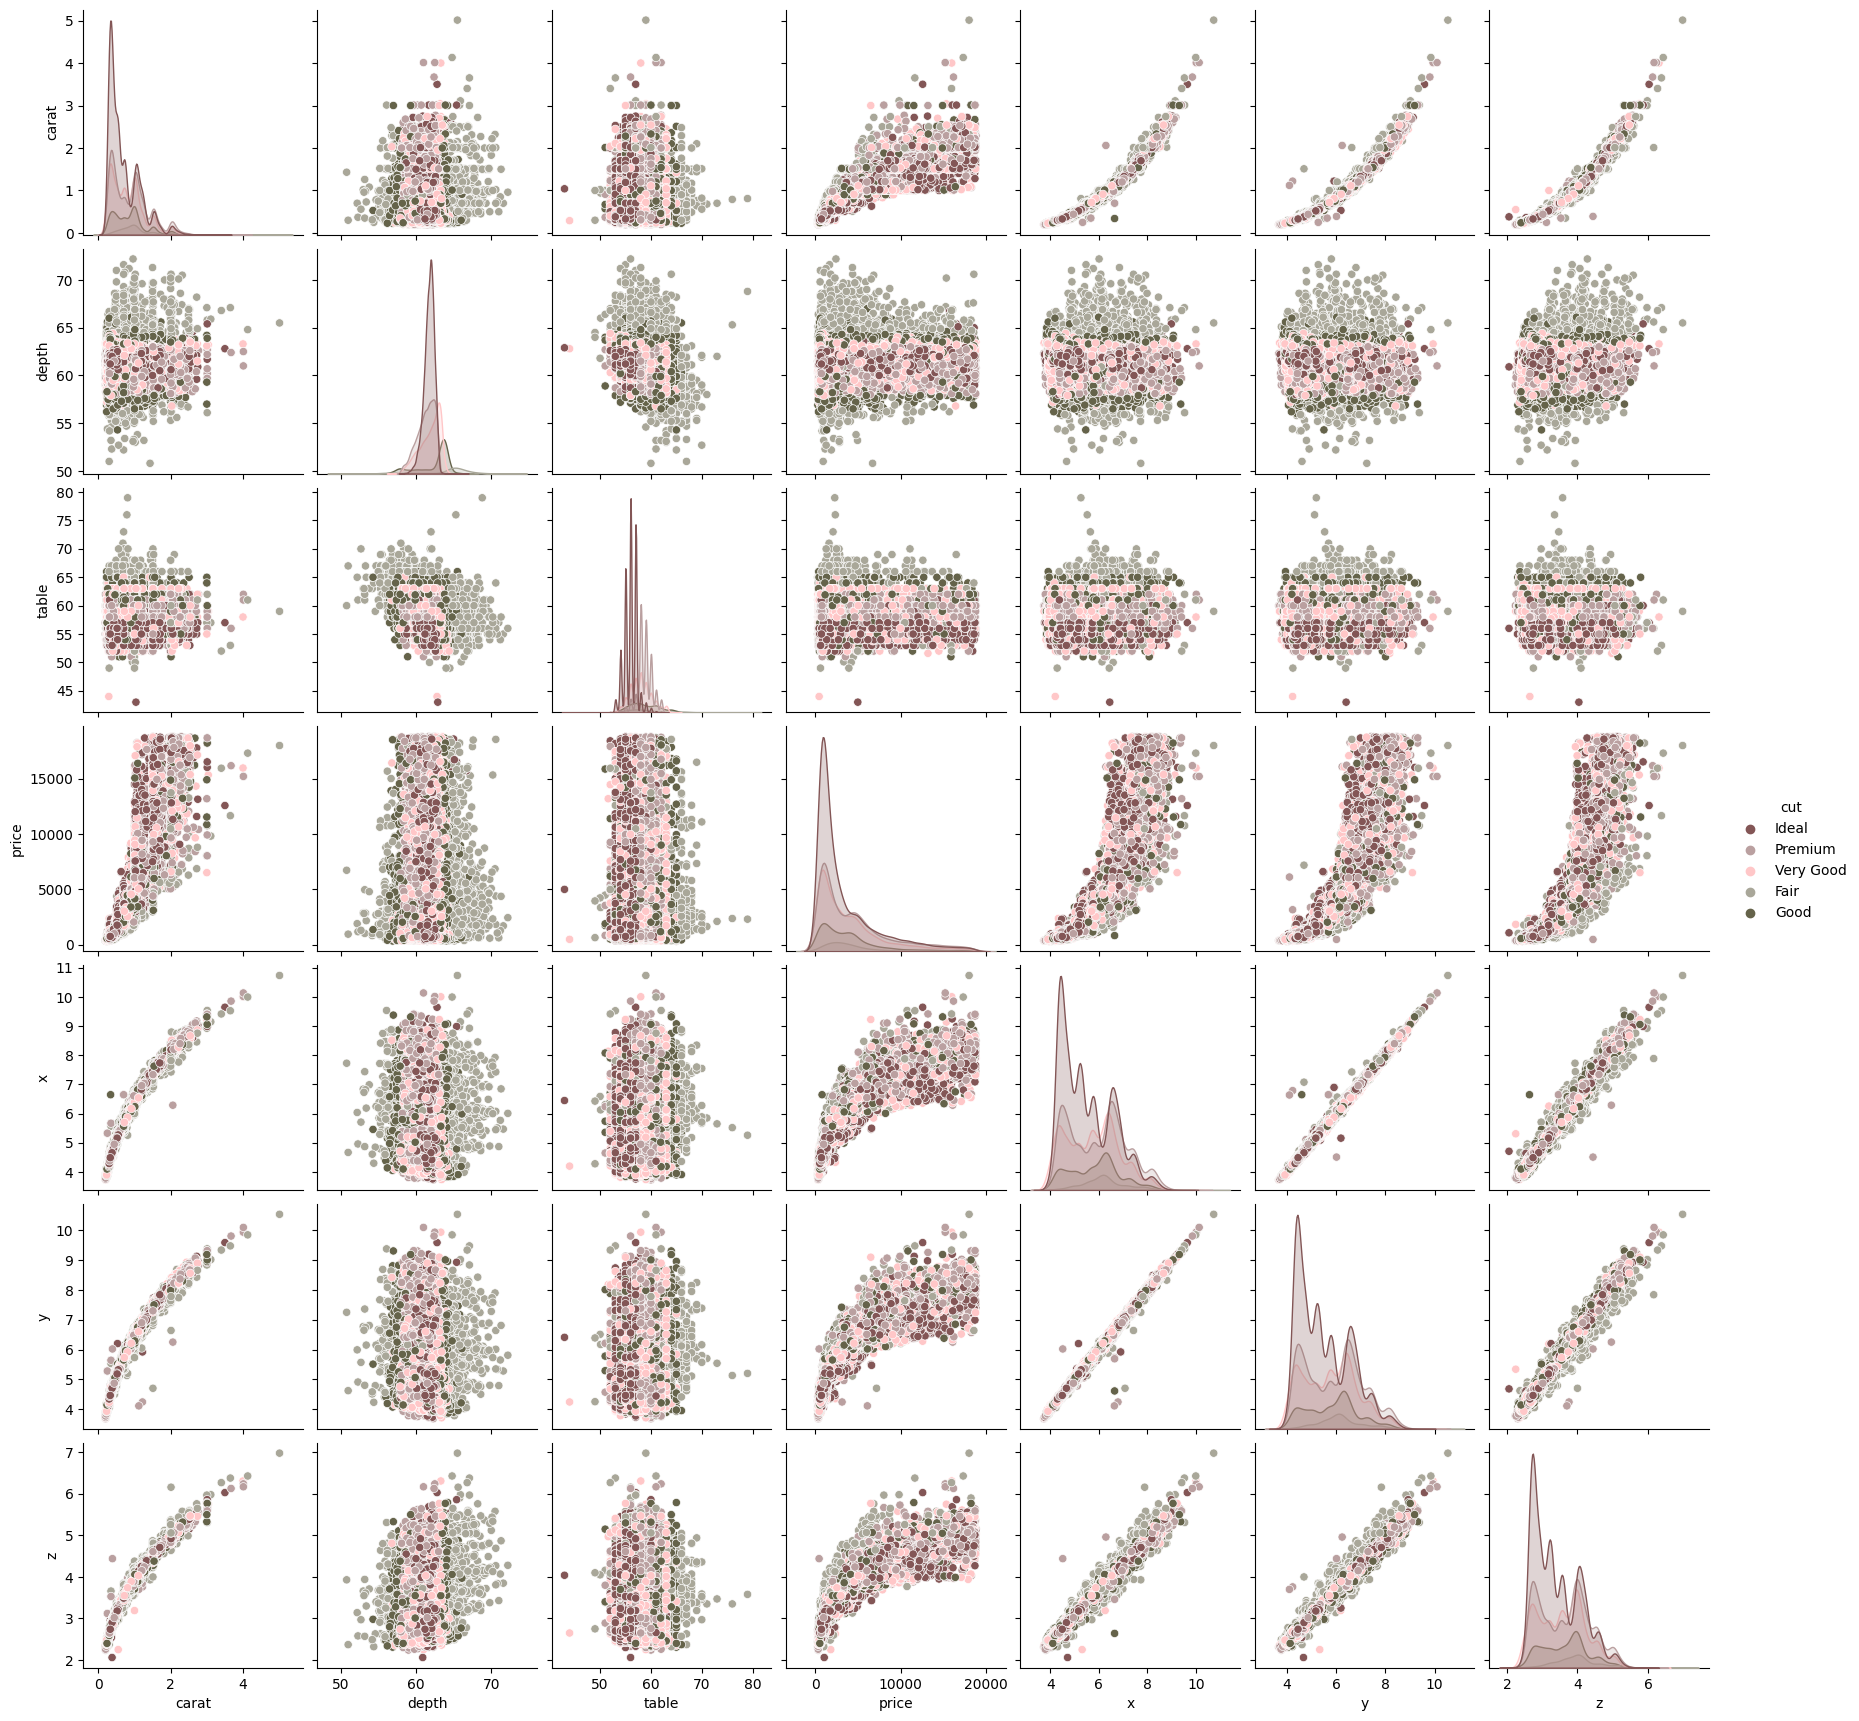

In [ ]:
ax=sns.pairplot(data, hue= "cut",palette=shade)
plt.savefig('my_plot20.png')

***
# 3-working with categorical variables
***

In [ ]:
cat = (data.dtypes =="object")
object_cols = list(cat[cat].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


We have three categorical variables. 
Let us have a look at them.

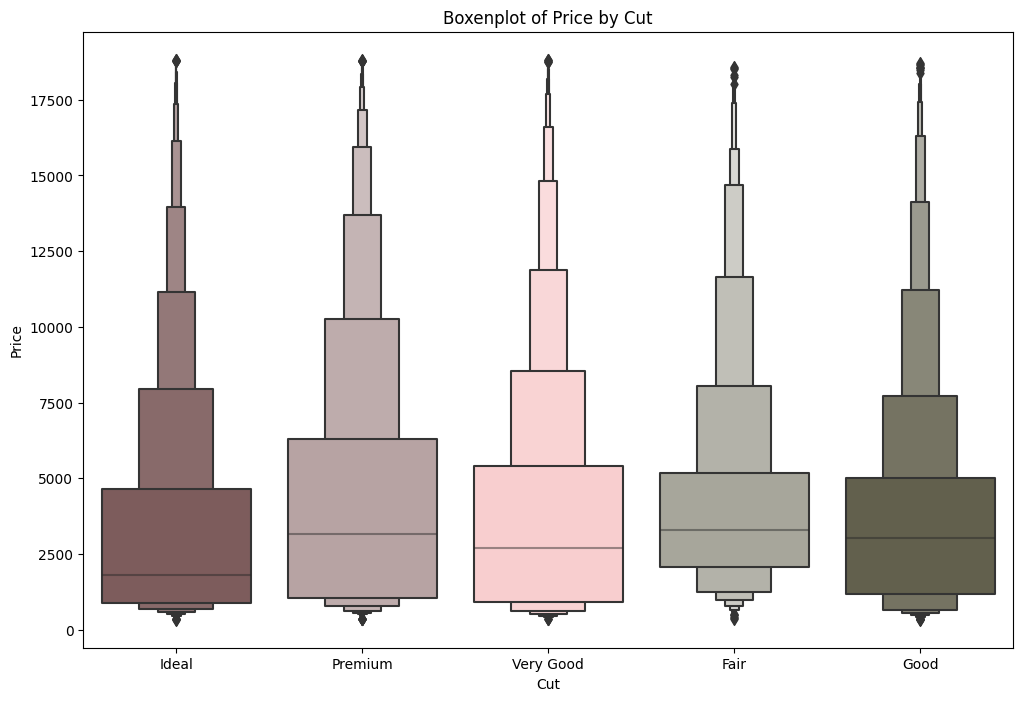

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))

sns.boxenplot(x="cut", y="price", data=data, palette=shade)
plt.title("Boxenplot of Price by Cut")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

plt.savefig('our_plot2.png')

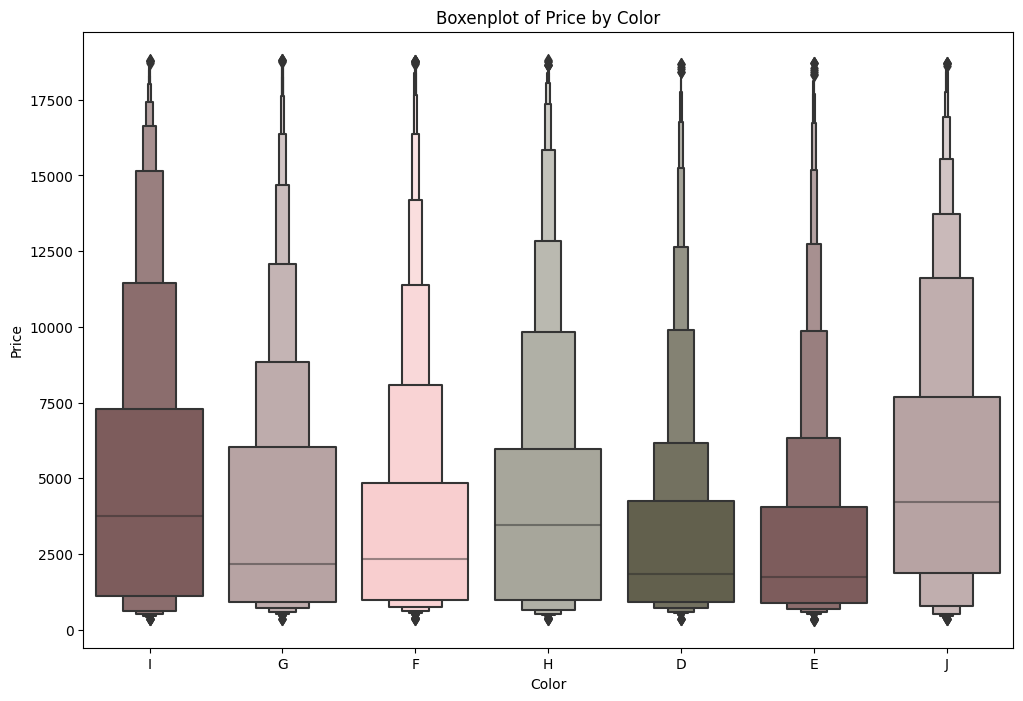

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))
sns.boxenplot(x="color", y="price", data=data, palette=shade)
plt.title("Boxenplot of Price by Color")
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()
plt.savefig('our_plot.png')

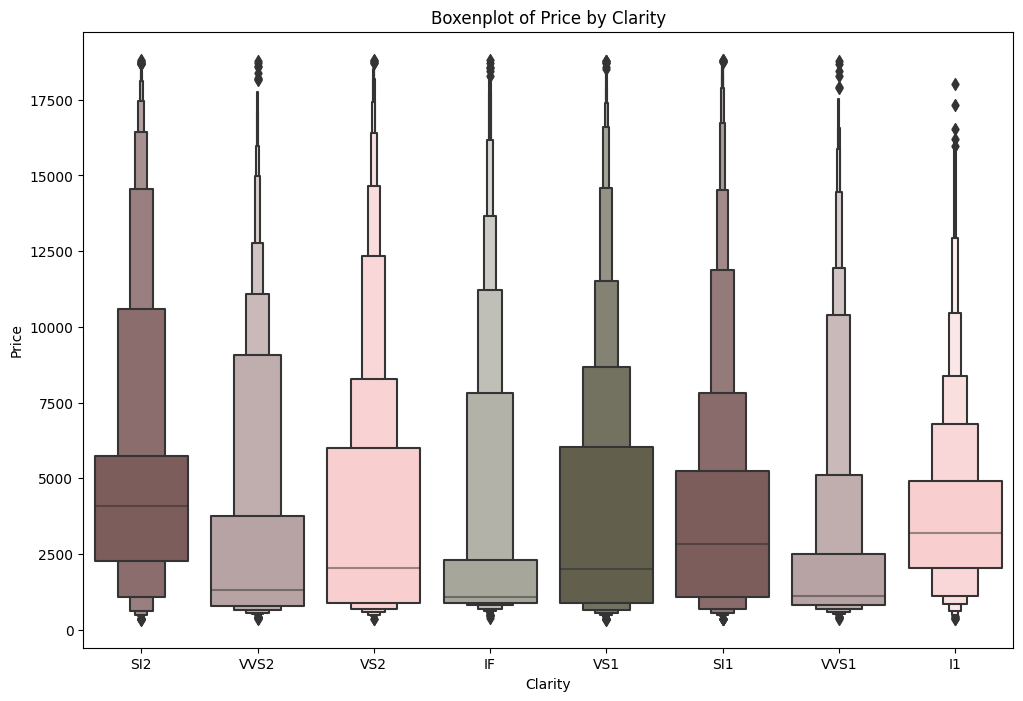

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))
sns.boxenplot(x="clarity", y="price", data=data, palette=shade)
plt.title("Boxenplot of Price by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()

plt.savefig('our_plot1.png')

Lable encoding the data to get rid of object dtype.

In [ ]:
label_data = data.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

carat  cut  color  clarity  depth  table  price      volume
0   1.06    2      5        3   61.8   57.0   4270  176.483340
1   1.51    3      3        7   60.9   58.0  15164  246.965796
2   0.32    2      2        5   61.3   56.0    828   52.943373
3   0.53    2      3        5   61.2   56.0   1577   86.422842
4   0.70    3      4        7   61.0   57.0   2596  115.315200

In [ ]:
test_data['volume'] = test_data['x'].values * test_data['y'].values * test_data['z'].values
test_data = test_data.drop(['x', 'y', 'z'], axis= 1)
label_encoder = LabelEncoder()
for col in object_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col])
test_data.head()

carat  cut  color  clarity  depth  table      volume
0   0.34    2      3        7   61.1   57.0   55.686400
1   0.71    3      1        5   62.7   58.0  116.719456
2   0.44    4      5        4   62.8   56.0   71.889720
3   0.81    3      1        3   60.1   59.0  134.037855
4   0.40    2      3        6   61.2   56.0   66.435840

<Axes: >

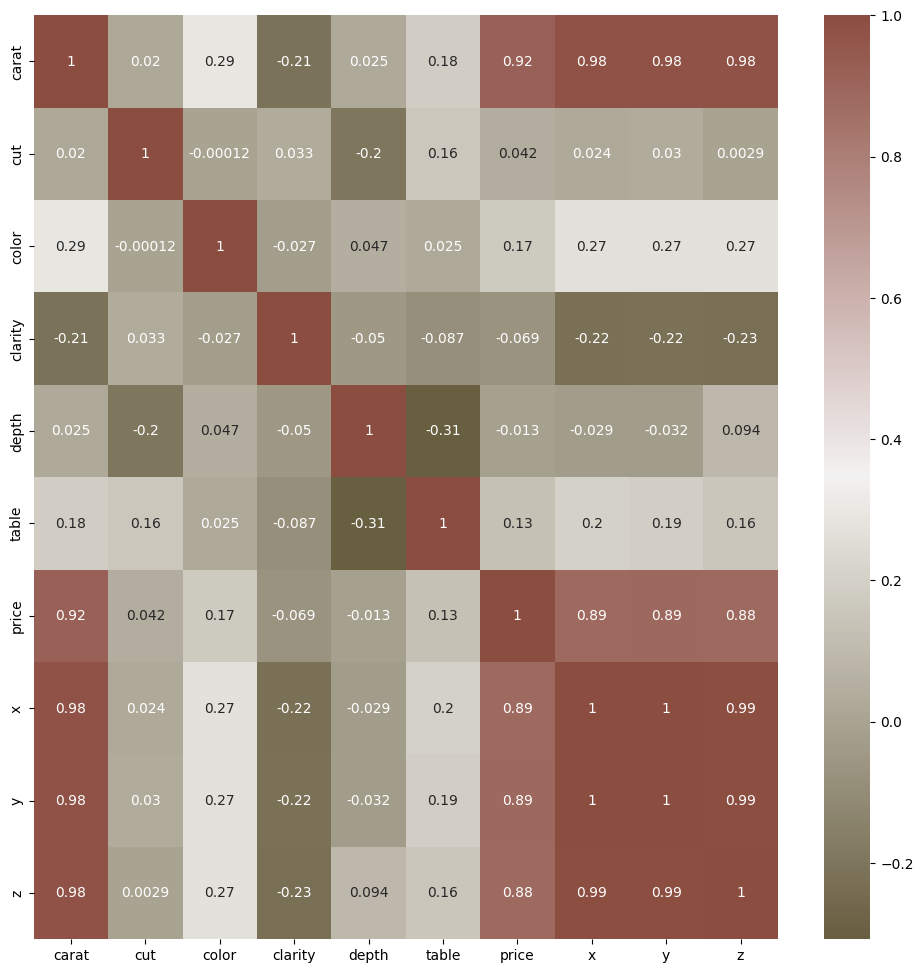

In [ ]:
#correlation matrix
corrmat= label_data.corr()
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )



**Steps involved in Model Building**


In [ ]:

X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train=X
X_test=test_data
y_train =y

In [ ]:
# Building pipelins

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn]


# Dictionary of pipelines 
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1366.797110 
DecisionTree: -734.825137 


**Testing the Model with the best score on the test set**

In [ ]:
# Model prediction on test data
pred = pipeline_rf.predict(X_test)

In [ ]:
test_id["price"]=pred

In [ ]:
test_id.to_csv("submissions5.csv", index=False)

In [ ]:
d = pd.read_csv("submissions5.csv")
d.head()

Id    price
0   1   962.46
1   2  2900.38
2   3   845.58
3   4  2842.73
4   5  1081.95